In [ ]:
%matplotlib inline
import os
import pandas as pd
from glob import glob
import numpy as np

from keras import models
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc

import IPython.display as ipd
# % pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

from keras.callbacks import EarlyStopping

from keras import regularizers

from sklearn.preprocessing import LabelEncoder

import os
from glob import glob
from google.colab import drive

drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
!unzip "/content/drive/Shared drives/Project 115/Data/wav.zip"
!mkdir train_images
!mkdir val_images
!mkdir test_images

Archive:  /content/drive/Shared drives/Project 115/Data/wav.zip
  inflating: JLCorpus_wav_1/female1_angry_10a_1.wav  
  inflating: JLCorpus_wav_1/female1_angry_10a_2.wav  
  inflating: JLCorpus_wav_1/female1_angry_10b_1.wav  
  inflating: JLCorpus_wav_1/female1_angry_10b_2.wav  
  inflating: JLCorpus_wav_1/female1_angry_11a_1.wav  
  inflating: JLCorpus_wav_1/female1_angry_11a_2.wav  
  inflating: JLCorpus_wav_1/female1_angry_11b_1.wav  
  inflating: JLCorpus_wav_1/female1_angry_11b_2.wav  
  inflating: JLCorpus_wav_1/female1_angry_12a_1.wav  
  inflating: JLCorpus_wav_1/female1_angry_12a_2.wav  
  inflating: JLCorpus_wav_1/female1_angry_12b_1.wav  
  inflating: JLCorpus_wav_1/female1_angry_12b_2.wav  
  inflating: JLCorpus_wav_1/female1_angry_13a_1.wav  
  inflating: JLCorpus_wav_1/female1_angry_13a_2.wav  
  inflating: JLCorpus_wav_1/female1_angry_13b_1.wav  
  inflating: JLCorpus_wav_1/female1_angry_13b_2.wav  
  inflating: JLCorpus_wav_1/female1_angry_14a_1.wav  
  inflating: JLCor

In [ ]:
def trainImages(file):

    audiofile = os.path.join(os.path.abspath('/content/JLCorpus_wav_1')+'/'+file.file.split(".wav")[0]+'.wav')
    
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   

    fig = plt.figure(figsize=[1,1])

    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)

    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')
    
    name = file.file.split(".wav")[0]
    file  = '/content/train_images/' + str(name) + '.jpg'
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    plt.close()

In [ ]:
def valImages(file):
    
    audiofile = os.path.join(os.path.abspath('/content/JLCorpus_wav_1')+'/'+file.file.split(".wav")[0]+'.wav')
    
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   

    fig = plt.figure(figsize=[1,1])

    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)

    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')
    
    name = file.file.split(".wav")[0]
    file  = '/content/val_images/' + str(name) + '.jpg'
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    plt.close()

In [ ]:
def testImages(file):

    audiofile = os.path.join(os.path.abspath('/content/JLCorpus_wav_1')+'/'+file.file.split(".wav")[0]+'.wav')
    
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   

    fig = plt.figure(figsize=[1,1])

    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)

    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')
    
    name = file.file.split(".wav")[0]
    file  = '/content/test_images/' + str(name) + '.jpg'
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    plt.close()

In [ ]:
filelist = os.listdir("/content/JLCorpus_wav_1") 

In [ ]:
observed_p_emotions=['angry', 'excited', 'happy', 'neutral', 'sad']
observed_s_emotions=['anxious', 'apologetic', 'confident', 'enthusiastic', 'worried']
observed_f_emotions=['angry', 'excited', 'happy', 'neutral', 'sad', 'anxious', 'apologetic', 'confident', 'enthusiastic', 'worried']
the_emotion = observed_f_emotions 

In [ ]:

#read them into pandas
train_df = pd.DataFrame(filelist)

# Renaming the column name to file
train_df = train_df.rename(columns={0:'file'})

# We create an empty list where we will append all the speakers ids for each row of our dataframe by slicing the file name since we know the id is the first number before the hash
emotion = []
num = []
for i in range(0, len(train_df)):
    emotion.append(train_df['file'][i].split('_')[1])
    if train_df['file'][i].endswith(("b_1.wav", "b_2.wav")):
        num.append(i)

# We now assign the speaker to a new column 
train_df['emotion'] = emotion

train_df = train_df.drop(train_df.index[num])

train_df = train_df[train_df['emotion'].isin(the_emotion)]
train_df = train_df.reset_index(drop=True)

In [ ]:
#read them into pandas
val_df = pd.DataFrame(filelist)

# Renaming the column name to file
val_df = val_df.rename(columns={0:'file'})

# We create an empty list where we will append all the speakers ids for each row of our dataframe by slicing the file name since we know the id is the first number before the hash
emotion = []
num = []
for i in range(0, len(val_df)):
    emotion.append(val_df['file'][i].split('_')[1])
    if val_df['file'][i].endswith(("a_1.wav", "a_2.wav", "b_2.wav")):
        num.append(i)
# We now assign the speaker to a new column 
val_df['emotion'] = emotion

val_df = val_df.drop(val_df.index[num])

val_df = val_df[val_df['emotion'].isin(the_emotion)]
val_df = val_df.reset_index(drop=True)

In [ ]:
#read them into pandas
test_df = pd.DataFrame(filelist)

# Renaming the column name to file
test_df = test_df.rename(columns={0:'file'})

# We create an empty list where we will append all the speakers ids for each row of our dataframe by slicing the file name since we know the id is the first number before the hash
emotion = []
num = []
for i in range(0, len(test_df)):
    emotion.append(test_df['file'][i].split('_')[1])
    if test_df['file'][i].endswith(("a_1.wav", "a_2.wav", "b_1.wav")):
        num.append(i)

# We now assign the speaker to a new column 
test_df['emotion'] = emotion

test_df = test_df.drop(test_df.index[num])

test_df = test_df[test_df['emotion'].isin(the_emotion)]
test_df = test_df.reset_index(drop=True)

In [ ]:
train = train_df
val = val_df
test = test_df

In [ ]:
train.apply(trainImages, axis=1);

In [ ]:
test.apply(testImages, axis=1);

In [ ]:
val.apply(valImages, axis=1);

In [ ]:
plt.close('all')

In [ ]:
os.system('say -v Juan ya acabé');

In [ ]:
train = train_df
val = val_df
test = test_df

In [ ]:
def make_jpg(files):
    return str(files.split(".wav")[0])+'.jpg'

In [ ]:
train["file"] = train["file"].apply(make_jpg)

In [ ]:
val["file"] = val["file"].apply(make_jpg)

In [ ]:
test["file"] = test["file"].apply(make_jpg)

In [ ]:

# Rescaling the images as usual to feed into the CNN
datagen=ImageDataGenerator(rescale=1./255.)

In [ ]:

train_generator=datagen.flow_from_dataframe(
    dataframe=train,
    directory="train_images",
    x_col="file",
    y_col="emotion",
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
    target_size=(64,64))

Found 1200 validated image filenames belonging to 10 classes.


In [ ]:
val_generator=datagen.flow_from_dataframe(
    dataframe=val,
    directory="val_images",
    x_col="file",
    y_col="emotion",
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
    target_size=(64,64))

Found 600 validated image filenames belonging to 10 classes.


In [ ]:
test_generator=datagen.flow_from_dataframe(
    dataframe=test,
    directory="test_images",
    x_col="file",
    y_col="emotion",
    batch_size=32,
    shuffle=False,
    class_mode="categorical",
    target_size=(64,64))

Found 600 validated image filenames belonging to 10 classes.


In [ ]:

plt.close('all')

In [ ]:
os.system('say -v Juan ya acabé');

In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(len(the_emotion), activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=18,
                    validation_data=val_generator,
                    validation_steps=32,
                    epochs=250)

Epoch 1/250
18/18 [==============================] - 4s 195ms/step - loss: 2.3343 - accuracy: 0.1181 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/250
18/18 [==============================] - 2s 87ms/step - loss: 2.3046 - accuracy: 0.1146
Epoch 3/250
18/18 [==============================] - 2s 87ms/step - loss: 2.3054 - accuracy: 0.0920
Epoch 4/250
18/18 [==============================] - 2s 84ms/step - loss: 2.3049 - accuracy: 0.1018
Epoch 5/250
18/18 [==============================] - 1s 83ms/step - loss: 2.3034 - accuracy: 0.1143
Epoch 6/250
18/18 [==============================] - 2s 84ms/step - loss: 2.3056 - accuracy: 0.0851
Epoch 7/250
18/18 [==============================] - 2s 86ms/step - loss: 2.3041 - accuracy: 0.0677
Epoch 8/250
18/18 [==============================] - 1s 83ms/step - loss: 2.3019 - accuracy: 0.1018
Epoch 9/250
18/18 [==============================] - 2s 84ms/step - loss: 2.3055 - accuracy: 0.0955
Epoch 10/250
18/18 [==============================] - 2s 

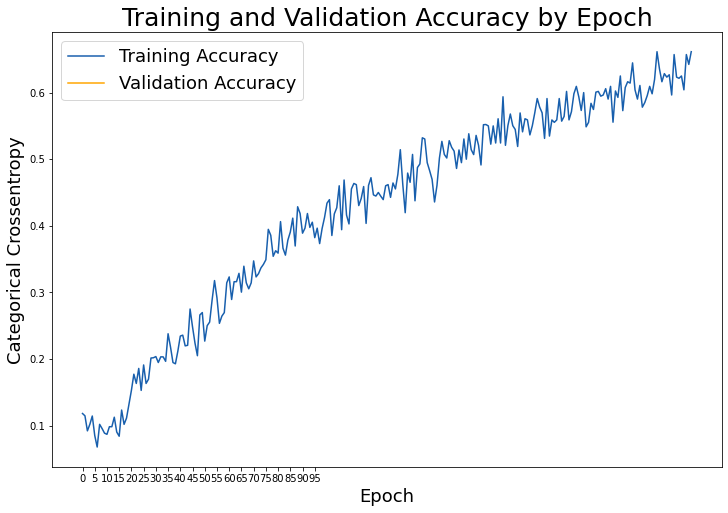

[0.1180555522441864, 0.1145833358168602, 0.0920138880610466, 0.10178571194410324, 0.11428571492433548, 0.0850694477558136, 0.0677083358168602, 0.10178571194410324, 0.0954861119389534, 0.0885416641831398, 0.0868055522441864, 0.0982142835855484, 0.0982142835855484, 0.11249999701976776, 0.0902777761220932, 0.08392857015132904, 0.1232638880610466, 0.10178571194410324, 0.1111111119389534, 0.1319444477558136, 0.1527777761220932, 0.1770833283662796, 0.1631944477558136, 0.1857638955116272, 0.1527777761220932, 0.1909722238779068, 0.1631944477558136, 0.1696428507566452, 0.2013888955116272, 0.20178571343421936, 0.20357142388820648, 0.19464285671710968, 0.203125, 0.203125, 0.1964285671710968, 0.2378472238779068, 0.21785713732242584, 0.19464285671710968, 0.1927083283662796, 0.2118055522441864, 0.234375, 0.23571428656578064, 0.21964286267757416, 0.2204861044883728, 0.2750000059604645, 0.24821428954601288, 0.2239583283662796, 0.2048611044883728, 0.2660714387893677, 0.2696428596973419, 0.2267857193946

In [ ]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18)
plt.show();
print(train_accuracy)
print(val_accuracy)

In [ ]:
# checking the accuracy of our model with this never before seen data
test = test_df

# Generating predictions on our never seen data with the model we built
preds = model.predict_generator(test_generator)

# Creating an empty list to store the values where the predictions are the maximum out 
# of all the 10 possible values
p = []
for i in range(0, len(preds)):
    p.append(np.where(preds[i] == max(preds[i])))

# Creating an empty list to store the values in a clean list
predictions = []
for i in range(0, len(preds)):
    predictions.append(p[i][0][0])

preds_cls_idx = preds.argmax(axis=-1)
idx_to_cls = {v: k for k, v in train_generator.class_indices.items()}
preds_cls = np.vectorize(idx_to_cls.get)(preds_cls_idx)
    
# Adding those predictions to our test dataframe
test['predictions'] = preds_cls

# Checking the percentage of correct predictions 
round(len(test[test['emotion'] == test['predictions']])/len(test),2)

Instructions for updating:
Please use Model.predict, which supports generators.


0.37